In [ ]:
import keras
from keras import layers

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0].shape

(28, 28, 1)

###### **To reshape the image for plotting either do the squeeze (not consider the filter/channeks that are not needed) or use reshape**

In [ ]:
x_train[0].reshape((28,28)).shape

(28, 28)

In [ ]:
x_train[0].squeeze(2).shape

(28, 28)

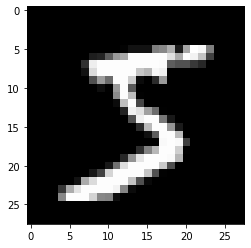

In [ ]:
#reshape or sqeeze to plot the image

#plt.imshow(x_train[0].reshape((28,28)), cmap="gray")
plt.imshow(x_train[0].squeeze(2), cmap='gray')

In [ ]:
#normalize the values from 0-255 to 0-1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
#define the convolutional model
input_img = keras.Input(shape=(28, 28, 1))
#stride 1,1 the images are also wvery close - feature extraction
# can do next layer conv2d 64- but was time comsuming
# can always go for overfitting then make less complex
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
#the last line is the classifer - make prediction- all above extract feature
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#check always the model summary and make sure the depth is not reaching to 1 or 0 , depth here is 32, can do layers to go down to 8
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0     

In [ ]:
# At this point an empty model is saved- run this cell once model (called autoencoder) is trained
autoencoder.save_weights("./practice_denoising.h5")

In [ ]:
x_test_noisy.shape

(10000, 28, 28, 1)

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
#in DL let's look at the train adn see the results (loss) on valdiation set- if the train loss (loss) and vlaidation loss (val loss) are both decreasing and close to each other we can add complexity to our model to make it more depth included. IF the val loss is not decreasing or starts increasing need to get rid of layers (depth )

autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 10s 7ms/step - loss: 0.2477 - val_loss: 0.1167
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1144 - val_loss: 0.1076
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1079 - val_loss: 0.1040
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1045 - val_loss: 0.1019
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1024 - val_loss: 0.1005
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1012 - val_loss: 0.0994
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0999 - val_loss: 0.0987
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0993 - val_loss: 0.0981
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0985 - val_loss: 0.0985
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0981 - val_l

In [ ]:
#do rpediction on subset of images
prediction = autoencoder.predict(x_test_noisy[0:5])

In [ ]:
#### reshape on new images or unsqueeze, 1 then put 

###### when calling new images for the model make sure aboutt he image shape as the input shape here in the modle is 28,28,1

In [ ]:
x_test_noisy[0].shape

(28, 28, 1)

In [ ]:
prediction.shape

(5, 28, 28, 1)

In [ ]:
#x_test_noisy[0].shape

(28, 28, 1)

In [ ]:
#look at the shape and see the need for squeeze to go for plotting the results
#prediction.shape

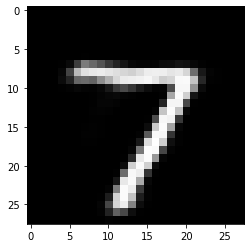

In [ ]:
#prediction shape is 28,28,2 and we do not need 2
plt.imshow(prediction[0].squeeze(2), cmap='gray')

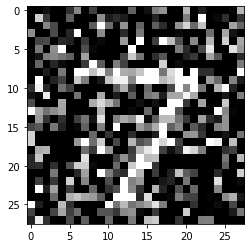

In [ ]:

#plot the noise added image
plt.imshow(x_test_noisy[0].squeeze(2), cmap='gray')

In [ ]:
#x_test_noisy[0].shape

(28, 28, 1)

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#renamed the model for loading and future uses - otherwise except removing ".compile" everything is the same with the define model in the begining
autoencoder_NEW = keras.Model(input_img, decoded)


In [ ]:
#load saved weights (model basically) and predict for new images (here one of the images is reused), 
autoencoder_NEW.load_weights("practice_denoising.h5")

In [ ]:
#but be careful of the dimentions once you load new images, the input shape for the model is 28,28,1
prediction2=autoencoder_NEW.predict(x_test_noisy[8])

In [ ]:
x_test_noisy[8].shape

(28, 28, 1)

In [ ]:
#### for brand new images there may be need for the new dimention --- squeeze/unse